Mushrooms Edibility Classification:
1) EDA Notes:
    - Season is not continuous it is categorical.
    - Continuous numeric variables such as cap diameter, stem length and stem thickness can be binned into categories.
    - There don't seem to be any ridiculous outliers, but we'll clean using the boxplot statistic to be sure.

2) Feature Engineering:
    - Convert seasons into categories.
    - Create interaction features from continuous variables.
    - Remove continuous outliers and then bin.
    - One hot encode categorical variables.

3) Modelling:
    - Split into training and test set (80/20).
    - Import and implement SKLearn's decision tree model.
    - Create confusion matrix for results.

In [41]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [42]:
# import dataset
mushrooms = pd.read_csv('..\data\mushroom_cleaned.csv')
mushrooms.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Corey\AppData\Local\Temp\ipykernel_10316\3420351090.py:2: SyntaxWarning: invalid escape sequence '\d'
  mushrooms = pd.read_csv('..\data\mushroom_cleaned.csv')


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [43]:
for item in mushrooms.columns:
    mushrooms = mushrooms.rename(columns = {item: item.replace('-', '_')})
mushrooms.columns

Index(['cap_diameter', 'cap_shape', 'gill_attachment', 'gill_color',
       'stem_height', 'stem_width', 'stem_color', 'season', 'class'],
      dtype='object')

In [44]:
# make season categories
mushrooms['season'] = mushrooms['season'].round(2).astype(str).astype('category')
print(mushrooms['season'].unique())

['1.8', '0.94', '0.89', '0.03']
Categories (4, object): ['0.03', '0.89', '0.94', '1.8']


In [45]:
# create boxplot cleaning function
def boxplot_clean(df: pd.DataFrame, cont_var_col: str) -> pd.DataFrame :

    # find quartiles and iqr
    var_lq = np.percentile(df[cont_var_col], 25)
    var_uq = np.percentile(df[cont_var_col], 75)
    var_iqr = var_uq - var_lq

    # find thresholds
    var_ut = var_uq + (1.5 * var_iqr)
    var_lt = var_lq - (1.5 * var_iqr)

    # filter df
    df = df.loc[(df[cont_var_col] >= var_lt) & (df[cont_var_col] <= var_ut)]

    return df

In [46]:
# clean df
print(len(mushrooms))
for col in ['cap_diameter', 'stem_width', 'stem_height']:
    mushrooms = boxplot_clean(mushrooms, col)

print(len(mushrooms))

54035
50801


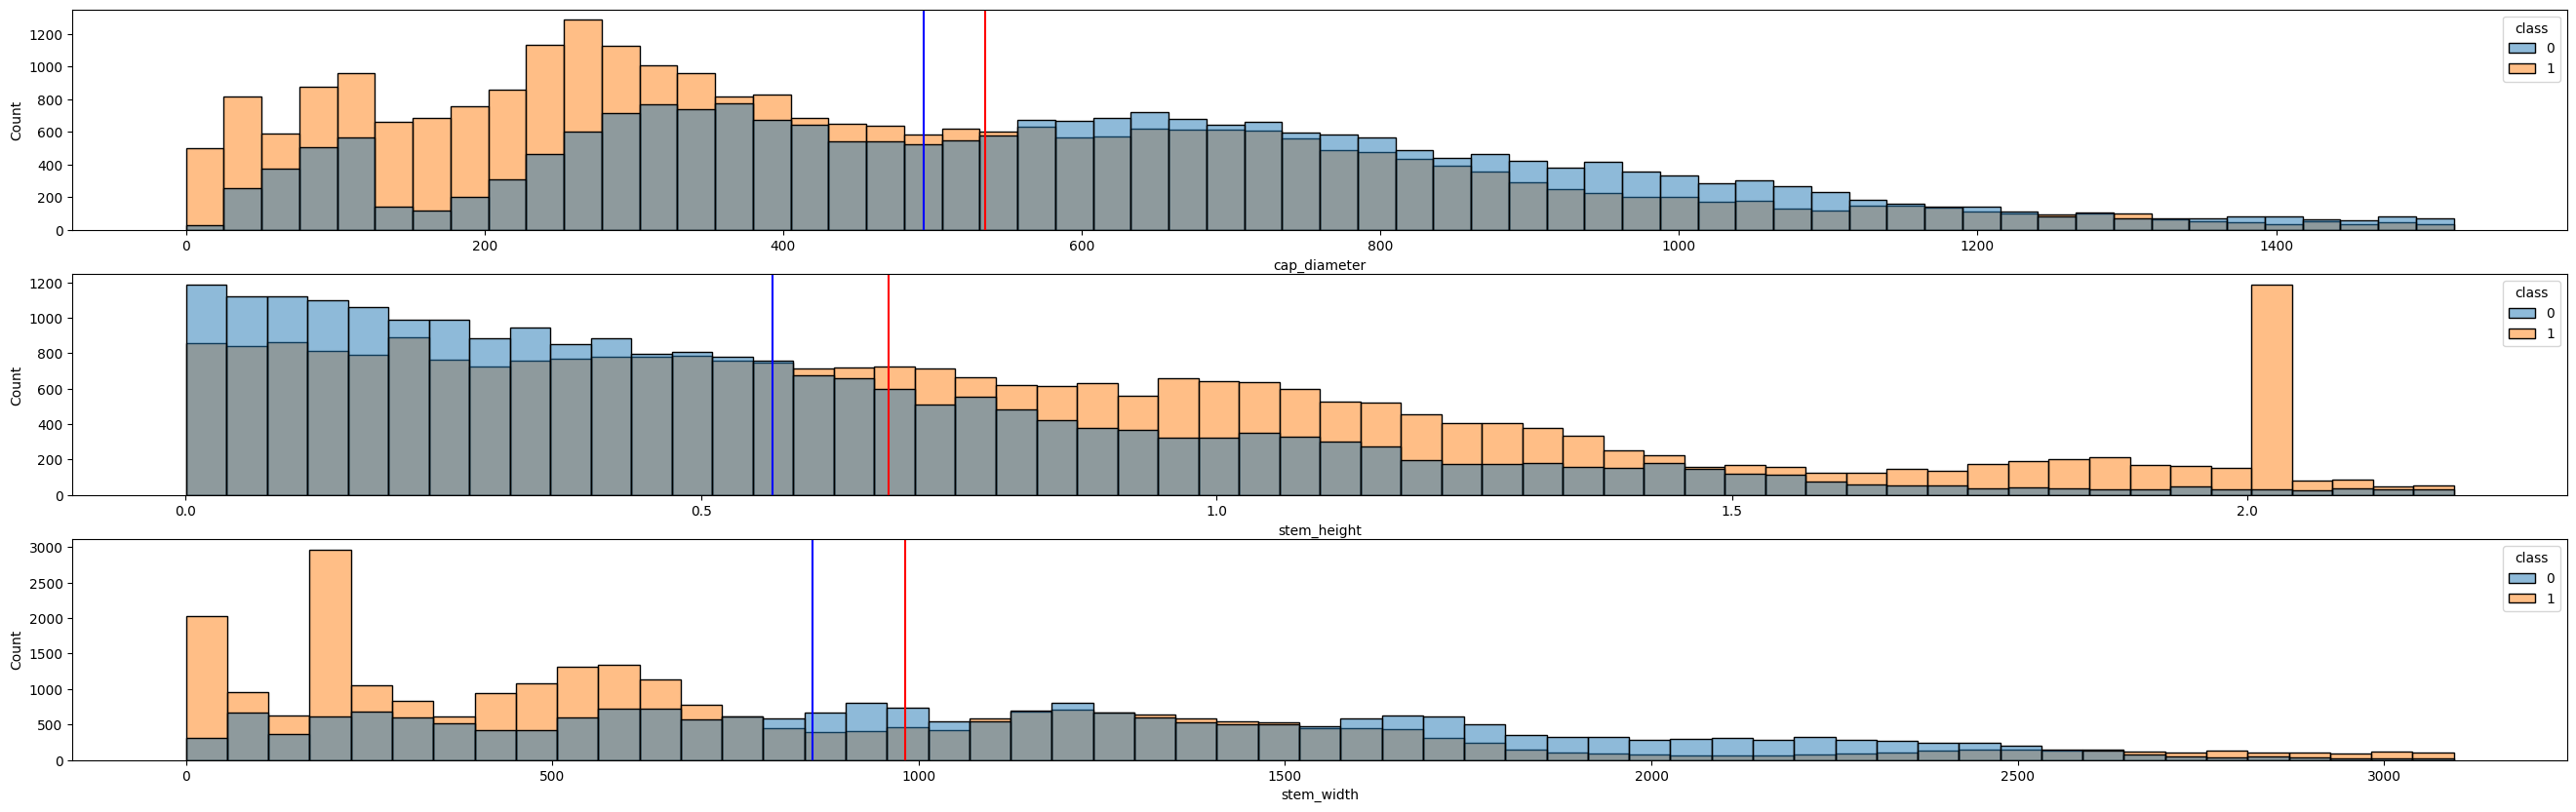

In [47]:
# check distribitions
numerical_cols = ['cap_diameter', 'stem_height', 'stem_width']
fig, ax = plt.subplots(len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    col_mean = mushrooms[numerical_cols[idx]].mean()
    col_med = mushrooms[numerical_cols[idx]].median()
    _ = sns.histplot(data = mushrooms, x = numerical_cols[idx], ax = ax[idx], hue = 'class')
    ax[idx].axvline(col_mean, color = 'red')
    ax[idx].axvline(col_med, color = 'blue')

In [48]:
# create interaction variables
mushrooms['stem_volume'] = (3.14 * ((mushrooms['stem_width'] / 2) ** 2) * mushrooms['stem_height'])
mushrooms['cap_area'] = 3.14 * ((mushrooms['stem_width'] / 2) ** 2)
mushrooms['stem_ratio'] = mushrooms['stem_width']/mushrooms['stem_height']

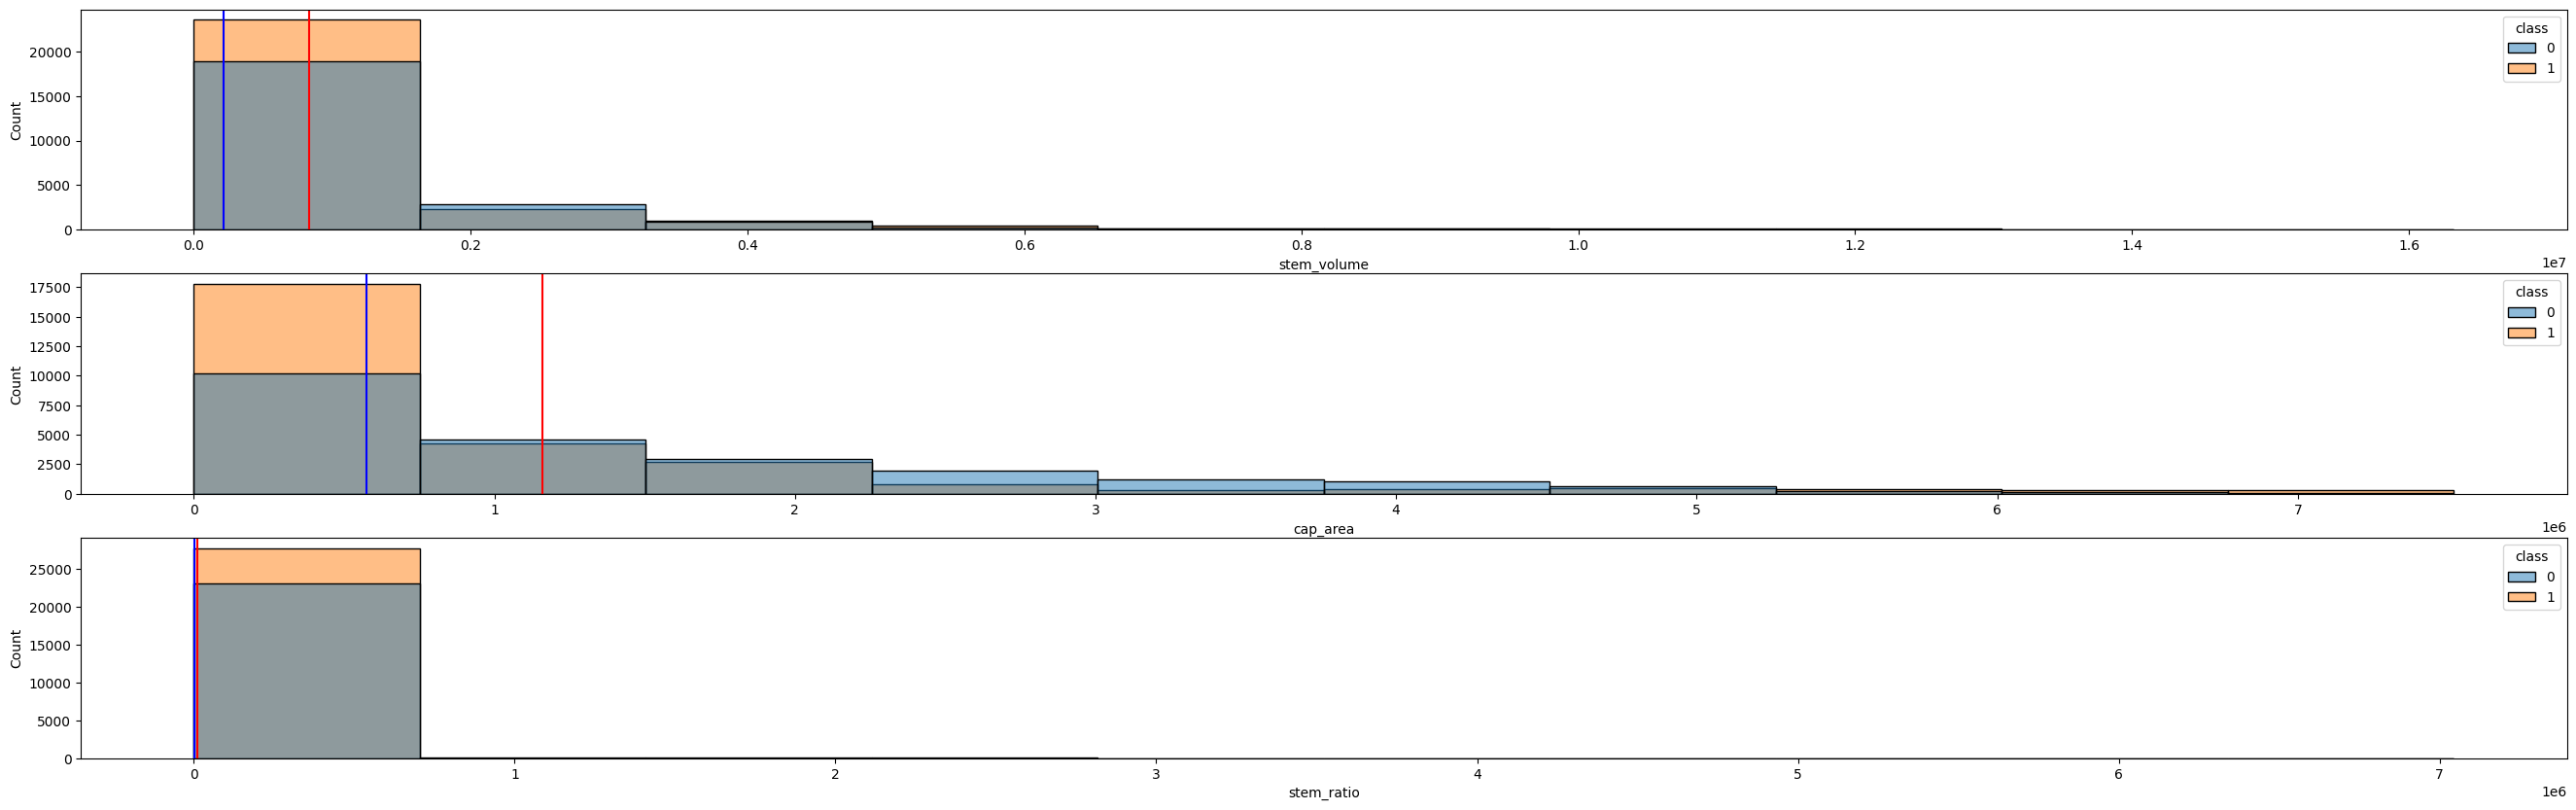

In [49]:
numerical_cols = ['stem_volume', 'cap_area', 'stem_ratio']
fig, ax = plt.subplots(nrows = len(numerical_cols), figsize = [33, 10])
for idx in range(len(numerical_cols)):
    col_mean = mushrooms[numerical_cols[idx]].mean()
    col_med = mushrooms[numerical_cols[idx]].median()
    _ = sns.histplot(data = mushrooms, x = numerical_cols[idx], ax = ax[idx], hue = 'class', bins = 10)
    ax[idx].axvline(col_mean, color = 'red')
    ax[idx].axvline(col_med, color = 'blue')

In [50]:
numerical_cols = ['stem_volume', 'cap_area', 'stem_ratio'] + ['cap_diameter', 'stem_height', 'stem_width'] + ['class']
cat_cols = [col for col in list(mushrooms.columns) if col not in numerical_cols]
print(cat_cols)

['cap_shape', 'gill_attachment', 'gill_color', 'stem_color', 'season']


In [51]:
for col in cat_cols:
    if col != 'class':
        mushrooms[col] = mushrooms[col].astype('category')

mushrooms = pd.get_dummies(mushrooms, columns= cat_cols, dtype= int)

mushrooms

,cap_diameter,stem_height,stem_width,class,stem_volume,cap_area,stem_ratio,cap_shape_0,cap_shape_1,cap_shape_2,...,stem_color_7,stem_color_8,stem_color_9,stem_color_10,stem_color_11,stem_color_12,season_0.03,season_0.89,season_0.94,season_1.8
11,642,0.286062,1311,1,3.859530e+05,1349195.985,4582.930443,0,0,0,...,0,0,0,0,1,0,0,0,1,0
12,814,1.189292,1681,1,2.638114e+06,2218222.385,1413.445974,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13,550,0.548675,1220,1,6.410683e+05,1168394.000,2223.539408,0,0,0,...,0,0,0,0,1,0,0,1,0,0
14,606,0.254230,1239,1,3.063645e+05,1205069.985,4873.547422,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15,721,0.950553,1445,1,1.558051e+06,1639099.625,1520.168264,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54030,73,0.887740,569,1,2.256213e+05,254152.385,640.953260,0,0,0,...,0,0,0,0,0,1,0,0,1,0
54031,82,1.186164,490,1,2.235665e+05,188478.500,413.096190,0,0,1,...,0,0,0,0,0,1,0,0,1,0
54032,82,0.915593,584,1,2.451308e+05,267728.960,637.837879,0,0,0,...,0,0,0,0,0,1,0,1,0,0
54033,79,1.034963,491,1,1.958653e+05,189248.585,474.413172,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [52]:
from sklearn.model_selection import train_test_split

x = mushrooms.drop(columns = ['class'])
y = mushrooms['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 30)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [54]:
predictions = model.predict(x_test)

In [55]:
predictions

array([0, 1, 0, ..., 1, 0, 1], shape=(10161,))

In [56]:
results = x_test
results['y'] = y_test
results['yhat'] = predictions
results

,cap_diameter,stem_height,stem_width,stem_volume,cap_area,stem_ratio,cap_shape_0,cap_shape_1,cap_shape_2,cap_shape_3,...,stem_color_9,stem_color_10,stem_color_11,stem_color_12,season_0.03,season_0.89,season_0.94,season_1.8,y,yhat
20177,377,0.012363,782,5.934652e+03,480046.340,63254.975364,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6564,413,0.198524,490,3.741746e+04,188478.500,2468.218514,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
44998,266,0.585337,987,4.476205e+05,764722.665,1686.207895,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18786,527,0.155606,660,5.320894e+04,341946.000,4241.474411,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
22699,401,0.684812,611,2.006889e+05,293056.985,892.215933,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22096,738,0.325851,2500,1.598708e+06,4906250.000,7672.208885,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
39232,664,0.759561,1206,8.672155e+05,1141732.260,1587.758832,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
19929,233,0.422199,578,1.107241e+05,262255.940,1369.024193,0,0,1,0,...,0,0,0,1,0,1,0,0,1,1
29916,895,0.119795,893,7.499160e+04,625997.465,7454.378476,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [57]:
results_conf_mat = results.groupby(['y', 'yhat']).agg(pct_results = ('cap_diameter', 'count')).reset_index()
results_conf_mat['pct_results'] = results_conf_mat['pct_results']/len(results)
results_conf_mat

,y,yhat,pct_results
0,0,0,0.436178
1,0,1,0.012204
2,1,0,0.012007
3,1,1,0.539612


In [58]:
importance_matrix = {'feature': x_train.columns, 'importance': model.feature_importances_}
pd.DataFrame(importance_matrix).sort_values('importance')

,feature,importance
34,stem_color_2,0.000000
36,stem_color_4,0.000000
32,stem_color_0,0.000000
41,stem_color_9,0.000177
37,stem_color_5,0.000190
29,gill_color_9,0.000935
46,season_0.89,0.001158
33,stem_color_1,0.001548
47,season_0.94,0.001922
20,gill_color_0,0.002317
